## Project: Predicting Boston Housing Prices

The Boston housing market is highly competitive, and we want to be the best real estate agent in the area. To compete with our peers, we decide to leverage a few basic machine learning concepts to assist us and a client with finding the best selling price for their home. Luckily, we’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. Our task is to build an optimal model based on a statistical analysis with the tools available. This model will then be used to estimate the best selling price for your clients' homes.

## Getting Started
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. We will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Hide warnings, implemented in this case to hide version warning
import warnings
warnings.filterwarnings('ignore')

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


/Users/arjanhada/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/arjanhada/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, we will make a cursory investigation about the Boston housing data and provide our observations. Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
We will calculate descriptive statistics about the Boston housing prices using `numpy` library. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, we will implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using our intuition, for each of the three features above, do we think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify answer for each.**

**Hint:** This problem can be phrased using examples like below.  
* Would we expect a home that has an `'RM'` value (number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would we expect a neighborhood that has an `'LSTAT'` value (percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would we expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **
<br>
1) An increase in `'RM'` value would lead to an increase in the value of `'MEDV'`. The higher number of rooms is something people will be willing to pay more for.
<br>
2) An increase in `'LSTAT'`/Neighborhood poverty level value would lead to a decrease in the value of `'MEDV'`. 
<br>
3) An increase in `'PTRATIO'` value would lead to a decrease in the value of `'MEDV'`. High student-teacher ratio is not a good indicator for schools. It typically results from lack of school funding and makes the neighborhood less appealing to parents.

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, we will implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The $R^2$ score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* $R^2$ score of 0 means that the dependent variable cannot be predicted from the independent variable.
* $R^2$ score of 1 means the dependent variable can be predicted from the independent variable.
* $R^2$ score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* $R^2$ score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
<br>
I consider this model to have successfully captured the variation of the target variable. To be precise, 92.3% of the variance in target variable is explained by model's combination of the independent variable with their respective coefficients and the constant term.

### Implementation: Shuffle and Split Data
Our next implementation requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, we will implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                   test_size = 0.2, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **
<br>
If we evaluate the performance of the model on the data it was trained on we won't be able to assess the performance of the model. We will not be able to evaluate the _generalization performance_ of the model on the unseen data. It is essential to practice in data mining procedures to keep a subset of data as holdout data- test data. We hide the label for target variable of the test data from the model and let the model predict the values for target variable. Then we compare the values predicted by the model with the hidden true values to assess the performance of the model.

What if the split we make isn't random? What if our data is ordered by certain attribute or the label of target variable? It might result in a subset of data belonging to one class in training set and another subset belonging to a different class in the test set. This will result in overfitting. It is recommended to shuffle the data before making a split. We also have to ensure the training and test splits have a class distribution that represents the overall data. It is required in cases of class imbalance where one class of target variable is represented more than another.

----

## Analyzing Model Performance
In this third section of the project, we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing our model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

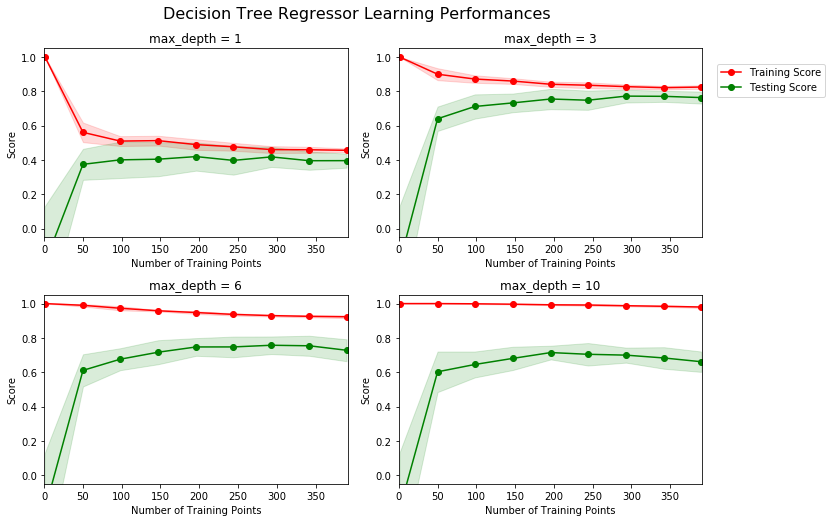

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

I choose the graph with `max_depth` of 3.

As more training points are added, the training score decreases and levels off after 300 training points. The uncertainty/variance of the curve also decreases. In contrast, the testing score rises until 300 training points and then levels off. The variance of the testing curve also decreases after 300 training points.

Both the training and testing curve have converged at the score of ~ 0.8.  The well-known principle Occam’s razor states “All else being equal, simpler models should be favored over more complex ones.” Adding more training points doesn't help the model. It increases the complexity of the model and the complex models are more prone to overfitting. It begins to pick up nuances in the data that are not characteristics of the population in general.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

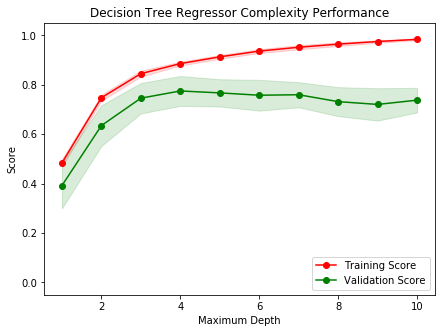

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting (model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting (model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **
<br>
The fitting curve shows - at a maximum depth of 1, the model has a high bias. The model makes simplifying assumptions about the data and does not describe the target variable well. 

At a maximum depth of 10, the model has high variance. The model becomes very complex and pays too much attention to the data. As a result, it tends to pick up spurious correlations (noise) in the data that are not the characteristics of the population in general.

As we increase the depth and hence complexity of the model, both the training score and validation score increases. The sweet spot is achieved at a depth of 4. Further increase in depth, increases the training score because the model is overfitting. At the same time, validation score starts to decrease as the model's ability to generalize decreases.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **
<br>
A model that generalizes best to unseen data is achieved at a maximum depth of 4. This spot is also called "sweet spot".

Starting at the left, the tree is very small (maximum depth = 1) and has poor performance. As we increase the depth of the tree, both the training score and the validation score increases. Also, we see that the training score is at least a little better than the validation score since the model learned from the training data. After the tree exceeds a maximum depth of 4, it begins to overfit. If we keep on increasing the depth, the nodes will be pure- all the instances in a given node will have the same value for the target variable. However, the validation accuracy declines past a maximum depth of 4. Ultimately, we are left with the single instance at each leaf node and a training score of 1. By this time (maximum depth = 10), the tree has memorized the entire training set. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify our answer, we can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **
<br>
Grid Search is the process of systematically working through multiple combinations of parameter tunes and cross validating as it goes to determine which combination of parameter gives us the best performance. The goal is to helps us select good and robust set of parameters for an algorithm to optimize its performance.

Typical examples include `max_depth` and `min_samples_split` for Decision Trees; `C`, `kernel` and `gamma` for Support Vector Classifier, etc. For instance, `max_depth` determines the level of a tree- the number of times the tree should be split. `min_samples_split` monitors the number of observations in a bucket/an internal node; if a certain threshold is reached no further splitting can be done.

The following `param_grid`:
```
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'min_samples_split': [3, 4, 5]
            }
```
specifies that the cross-product of `max_depth` values ranging in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] and `min_samples_split` in [3, 4, 5] should be explored. The process will methodically build and evaluate the model for each combination of algorithm parameters specified in a grid.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. We can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **
<br>
k-fold cross-validation (CV) helps us make the efficient use of the original labeled data to estimate the performance of the modeling process. k-fold cross-validation begins by dividing the labeled data into k partitions of roughly equal size called k folds. The first fold is treated as the testing set (holdout set) and the remaining k-1 folds are chosen as the training set. The model is trained on k-1 folds (training set) and the performance estimate is calculated from the observations in the testing set. This procedure is repeated k times, each time a different fold is chosen as the testing set. So each iteration has (k-1)/k fold as training set and 1/k fold as the testing set.  Finally, we have performance estimate from k experiments and we can compute the mean and standard deviation.

By default, the k-folds cross-validator in sklearn does not shuffle the data before splitting into batches. If our data is arranged in any particular order, let's say labels in our target variable, it will be advantageous to shuffle the data before splitting into partitions. 

Cross-validation conducts automated experiments on subsets of the training data and finds good parameter values for grid search when optimizing a model. For example, we could perform grid search without cross validation by splitting the training data into 80:20 training/validation set and train each parameter combination on the training set and get its performance score on the validation set. However, it is a single estimate. We have no idea about the statistics on the estimated performance such as mean and variance. With k-fold cross-validation grid search will return the optimal parameter values based on the average test performance for each parameter value. For example, if we are optimizing the C parameter, we chose a grid of C values and compute the cross-validation error for each value of the C as described in the first paragraph. We then select the tuning parameter value for which the cross-validation error is the minimum. Finally, the model is fitted using all the available observations and the selected value of the tuning parameter.

### Implementation: Fitting a Model
Our final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, we will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While we're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid = params, cv = cv_sets, scoring = scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
<br>
The optimal model has a maximum depth of 4. The result aligns perfectly with my prediction.

### Question 10 - Predicting Selling Prices
Imagine that we are a real estate agent in the Boston area looking to use this model to help price homes owned by our clients that they wish to sell. We have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: **
<br>
The recommended selling price for the homes are:

| Client | Selling Price $ | 
| :---: | :---: | 
| Client 1  | 391,183.33 | 
| Client 2 | 189,123.53 | 
| Client 3 | 942,666.67|

Yes, the price seems reasonable given the values for the respective features. 

- Client 3 has the biggest house, in the best public school neighborhood with the lowest poverty level. The selling price is three standard deviation above the median. The number of rooms in the house is more than the median number of rooms, and the neighborhood poverty level and student-teacher ratio is also better than the median of all the houses.

- Client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools, hence the lowest selling price. The selling price of this house is close to the minimum of all the houses.

- Client 1's house is in between Client 2 and 3, and so is the price.

In [11]:
print features.describe()
print "\n"
print prices.describe()

               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000


count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do we think factors like quality of appliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **
<br>
- **Relevancy**: The data is 29 years old as of this year 2017. The model is not relevant in today's world because of inflation. It is natural for prices to rise over time. Even when we adjust prices for inflation, the housing prices could have outpaced inflation because of other factors.
- **Features**: We have built the model on three features not enough to describe a home. The size of the home is more than the number of rooms. Other factors like the square feet of the plot area; the presence of garage, pool, garden; quality of appliances in the home; proximity to public transports should be considered.
- **Robustness**: When we ran the model ten times with different training and testing sets to see the prediction for a specific client, there is a wide variance in pricing from \$351,577.61 to \$424,935.00. The model could vary by as much as 20% which is unsatisfactory in the real world.
- **Applicability**: The model trained in an urban city like Boston is not applicable in a rural city. The urban cities have higher housing prices in general compared to rural cities. There characteristics like climate, geography, proximity to beaches, weather conditions, job opportunities vary between cities and might affect housing prices.
- **Neighborhood characteristics**: While neighborhood characteristics are not the only feature relevant to pricing, it is an important one. For example, student-teacher ratio determines the quality of schools in the neighborhood and might affect house prices. The price of a house in San Fransisco Bay area will be higher because of proximity to best opportunities. In another hand, the price of a house in a neighborhood with high crime rate might be lower.

## References

- 1) [Machine Learning Nanodegree](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009)
- 2) [Data Science for Business: What You Need to Know About Data Mining and Data-Analytic Thinking](http://www.data-science-for-biz.com/DSB/Home.html)